In [1]:
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import matplotlib.pyplot as plt
import networkx as nx

/Users/dhruvpai/miniconda3/envs/myenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Step 1: Load the dataset
# Update the path below based on where you saved the CSV file
df = pd.read_csv('/Users/dhruvpai/Downloads/practicals/heart.csv')

In [3]:
# Display the first few rows to understand the structure of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
print(df.shape)
print(df.columns)

(1025, 14)
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
model = BayesianNetwork([('age', 'target'), ('sex','cp'), ('cp','target'), ('trestbps','target'), ('chol','target'),])

In [8]:
model.fit(data=df, estimator=MaximumLikelihoodEstimator)

In [9]:
model.nodes

NodeView(('age', 'target', 'sex', 'cp', 'trestbps', 'chol'))

In [10]:
HeartDiseaseInfer = VariableElimination(model)

In [11]:
q1 = HeartDiseaseInfer.query(variables=['target'], evidence={'age':70})
print(q1)

+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.5002 |
+-----------+---------------+
| target(1) |        0.4998 |
+-----------+---------------+


In [12]:
q2 = HeartDiseaseInfer.query(variables=['target'], evidence={'cp':3} )
print(q2)

+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.4999 |
+-----------+---------------+
| target(1) |        0.5001 |
+-----------+---------------+


In [13]:
q3 = HeartDiseaseInfer.query(variables=['target'], evidence={'sex':0})
print(q3)

+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.5000 |
+-----------+---------------+
| target(1) |        0.5000 |
+-----------+---------------+


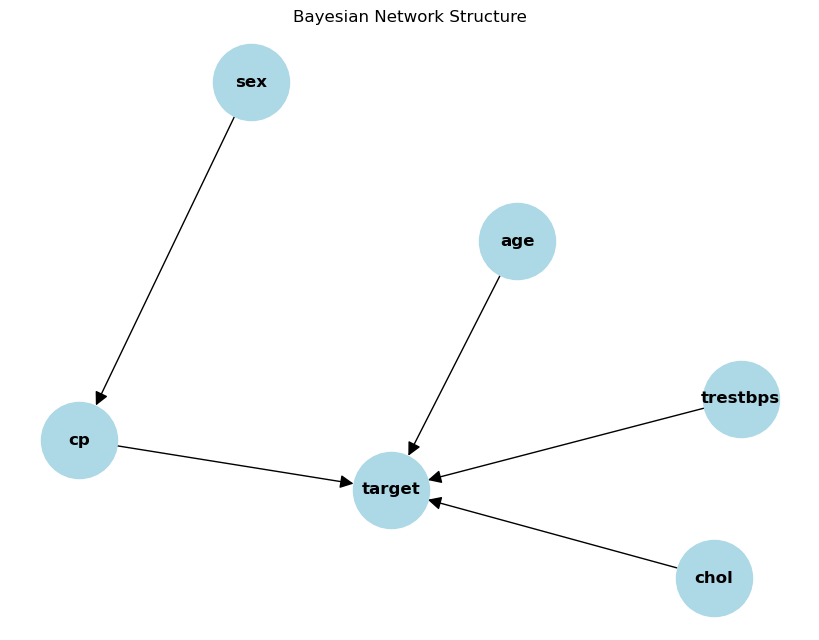

In [14]:
graph = nx.DiGraph()
graph.add_edges_from(model.edges())

# Plot the network
plt.figure(figsize=(8, 6))
nx.draw(graph, with_labels=True, node_size=3000, node_color='lightblue', font_size=12, font_weight='bold', arrowsize=20)
plt.title("Bayesian Network Structure")
plt.show()

EXPLANATION:
-----

pandas: Used for data manipulation and loading CSV files.
pgmpy: A Python library for probabilistic graphical models (like Bayesian Networks).
BayesianNetwork: A class for defining and working with Bayesian Networks.
TabularCPD: Used to define Conditional Probability Distributions (CPDs).
MaximumLikelihoodEstimator: For parameter estimation based on data.
VariableElimination: A method for performing inference in probabilistic graphical models.
matplotlib: For plotting graphs.
networkx: For graph-based network representation (used to plot the Bayesian Network structure).

1. LOADING THE DATASET:

- pd.read_csv(): Reads the heart disease dataset from the specified path.
- df.head(): Displays the first few rows of the dataset.
- df.shape: Prints the dimensions (rows and columns) of the dataset.
- df.columns: Lists the column names in the dataset.
- df.describe(): Provides summary statistics of numerical columns.
- df.isna().sum(): Checks for any missing values in the dataset.

2. Defining the Bayesian Network Model:

BayesianNetwork(): Initializes a Bayesian Network with the defined structure. This structure specifies the relationships between the variables:
- 'age' influences 'target'.
- 'sex' influences 'cp'.
- 'cp' influences 'target'.
- 'trestbps' (resting blood pressure) influences 'target'.
- 'chol' (cholesterol) influences 'target'.

3. Fitting the Model:

- fit(): This method estimates the parameters of the Bayesian Network (i.e., the conditional probability distributions) using Maximum Likelihood Estimation (MLE) based on the provided dataset df.

4. Performing Inference:

- VariableElimination(): This initializes an inference engine based on the Bayesian Network.
- query(): The method performs probabilistic inference on the model. For example:
- q1: Given age=70, what is the probability distribution for target (whether the person has heart disease)?
- q2: Given cp=3 (chest pain type), what is the probability distribution for target?
- q3: Given sex=0 (male), what is the probability distribution for target?

5. Plotting the Network:

- nx.DiGraph(): Creates a directed graph (to represent the Bayesian Network structure).
- model.edges(): Retrieves the edges of the Bayesian Network.
- nx.draw(): Visualizes the Bayesian Network structure using networkx and matplotlib.

ORAL QUESTIONS :
----

1. What is a Bayesian Network Model?

A Bayesian Network is a probabilistic graphical model that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). In a Bayesian Network, each node represents a random variable, and the edges between them represent the conditional dependencies. It allows for reasoning under uncertainty, making predictions and understanding the relationships between variables.

2. What are the attributes used in the Heart Disease Dataset?

Based on the model structure and typical heart disease datasets, the following attributes are used:
age: Age of the patient.
sex: Gender of the patient (1 = male, 0 = female).
cp: Chest pain type (a categorical variable with multiple levels).
trestbps: Resting blood pressure.
chol: Serum cholesterol level.
target: Heart disease diagnosis (1 = disease, 0 = no disease).

3. What is pgmpy?

pgmpy (Probabilistic Graphical Models using Python) is an open-source library for working with probabilistic graphical models, including Bayesian Networks, Markov Networks, and other probabilistic models. It provides functionalities for defining models, performing inference, and learning parameters from data. The library supports both exact and approximate inference algorithms and offers tools to visualize the structure of probabilistic models.
